# Import Libraries

In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest 
from sklearn.model_selection import train_test_split

# Loading the Dataset

In [73]:
df = pd.read_excel("Dataset Shrimple (Breedable).xlsx")

print(df)

          Date PondID   DOC   ph  Salinity  Transparency  Alkalinity  \
0   2024-10-12    H01   NaN  8.4        10          50.0       102.0   
1   2024-10-12    A01   NaN  8.5        14          45.0        85.0   
2   2024-10-12    A02   NaN  8.5        10          45.0        68.0   
3   2024-10-13    H01   NaN  8.5         9          50.0       119.0   
4   2024-10-13    A01   NaN  8.6        14          50.0       102.0   
..         ...    ...   ...  ...       ...           ...         ...   
341 2025-01-31    A03  31.0  8.0        15          20.0         NaN   
342 2025-01-31    A04  31.0  7.8        15          25.0         NaN   
343 2025-01-31    A05  31.0  8.0        14          15.0         NaN   
344 2025-01-31    A06  22.0  8.2        17          35.0         NaN   
345 2025-01-31    A07  22.0  8.3        15          35.0         NaN   

        Status  
0    Breedable  
1    Breedable  
2    Breedable  
3    Breedable  
4    Breedable  
..         ...  
341  Breedable  

# Exploratory Data Analysis

## The first five rows of the Dataframe

In [74]:
print("HEAD \n", df.head(), "\n")


HEAD 
         Date PondID  DOC   ph  Salinity  Transparency  Alkalinity     Status
0 2024-10-12    H01  NaN  8.4        10          50.0       102.0  Breedable
1 2024-10-12    A01  NaN  8.5        14          45.0        85.0  Breedable
2 2024-10-12    A02  NaN  8.5        10          45.0        68.0  Breedable
3 2024-10-13    H01  NaN  8.5         9          50.0       119.0  Breedable
4 2024-10-13    A01  NaN  8.6        14          50.0       102.0  Breedable 



## Summary

In [75]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          346 non-null    datetime64[ns]
 1   PondID        346 non-null    object        
 2   DOC           227 non-null    float64       
 3   ph            321 non-null    float64       
 4   Salinity      346 non-null    int64         
 5   Transparency  339 non-null    float64       
 6   Alkalinity    103 non-null    float64       
 7   Status        346 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 21.8+ KB
None


## Descriptive Statistics

In [76]:

print("\n", df.describe())


                                 Date         DOC         ph    Salinity  \
count                            346  227.000000  321.00000  346.000000   
mean   2024-12-11 11:51:40.578034432   27.244493    8.11215   10.315029   
min              2024-10-12 00:00:00    2.000000    7.00000    6.000000   
25%              2024-11-10 06:00:00   13.000000    8.00000    8.000000   
50%              2024-12-11 00:00:00   25.000000    8.00000   10.000000   
75%              2025-01-14 00:00:00   40.500000    8.30000   12.000000   
max              2025-01-31 00:00:00   66.000000   12.00000   18.000000   
std                              NaN   17.294262    0.34858    3.171733   

       Transparency  Alkalinity  
count    339.000000  103.000000  
mean      37.882006  112.592233  
min        2.000000   68.000000  
25%       25.000000  102.000000  
50%       35.000000  119.000000  
75%       50.000000  119.000000  
max       75.000000  136.000000  
std       16.872589   16.354191  


## Shape of the Dataframe
The repesentation of the number of rows and columns in a dataframe as a tuple.

In [77]:
print(df.shape)

(346, 8)


## Columns

In [78]:
print(df.columns.tolist())

['Date', 'PondID', 'DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity', 'Status']


## Missing and Duplicate Values

In [79]:
print("Missing values")
print(df.isnull().sum(), "\n")

print("Duplicate Values")
print(df.nunique())

Missing values
Date              0
PondID            0
DOC             119
ph               25
Salinity          0
Transparency      7
Alkalinity      243
Status            0
dtype: int64 

Duplicate Values
Date            101
PondID            8
DOC              60
ph               16
Salinity         13
Transparency     15
Alkalinity        8
Status            1
dtype: int64


## Feature Distribution

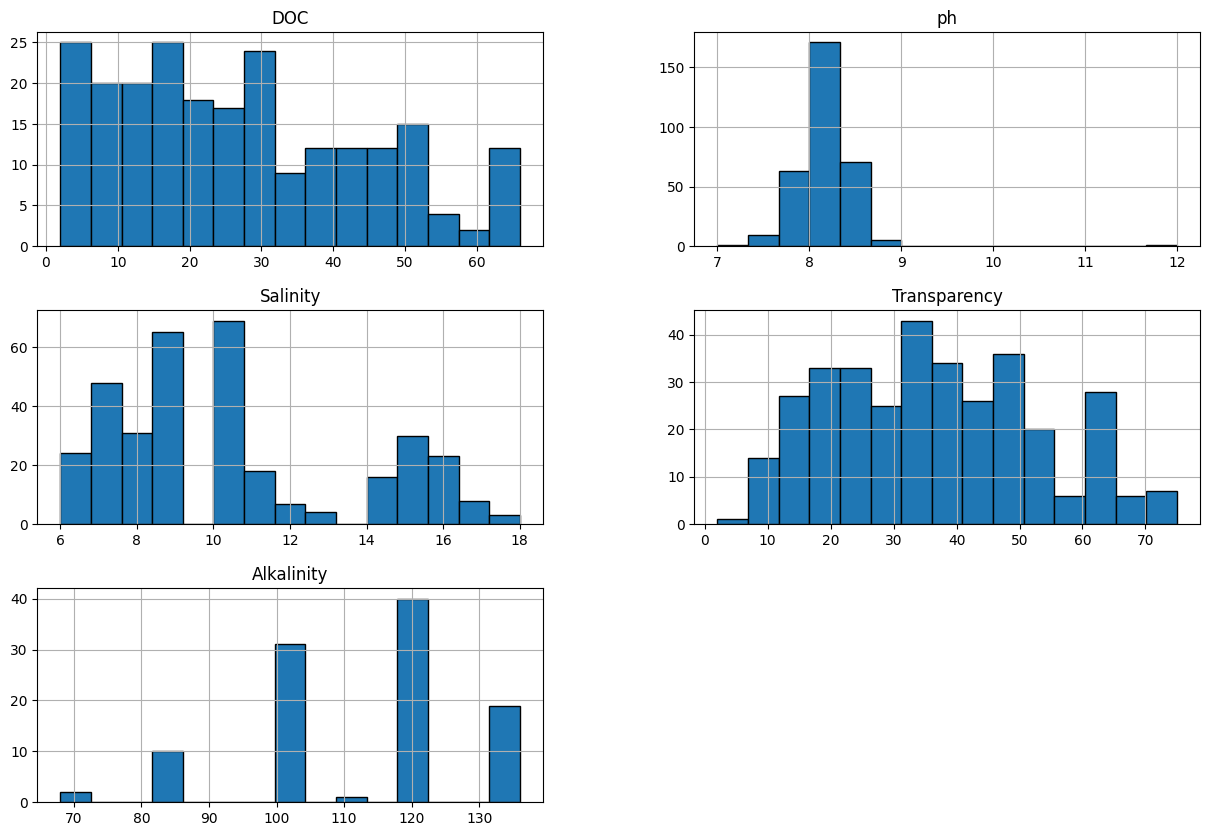

In [80]:
df[['DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity']].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.show()

## Outliers

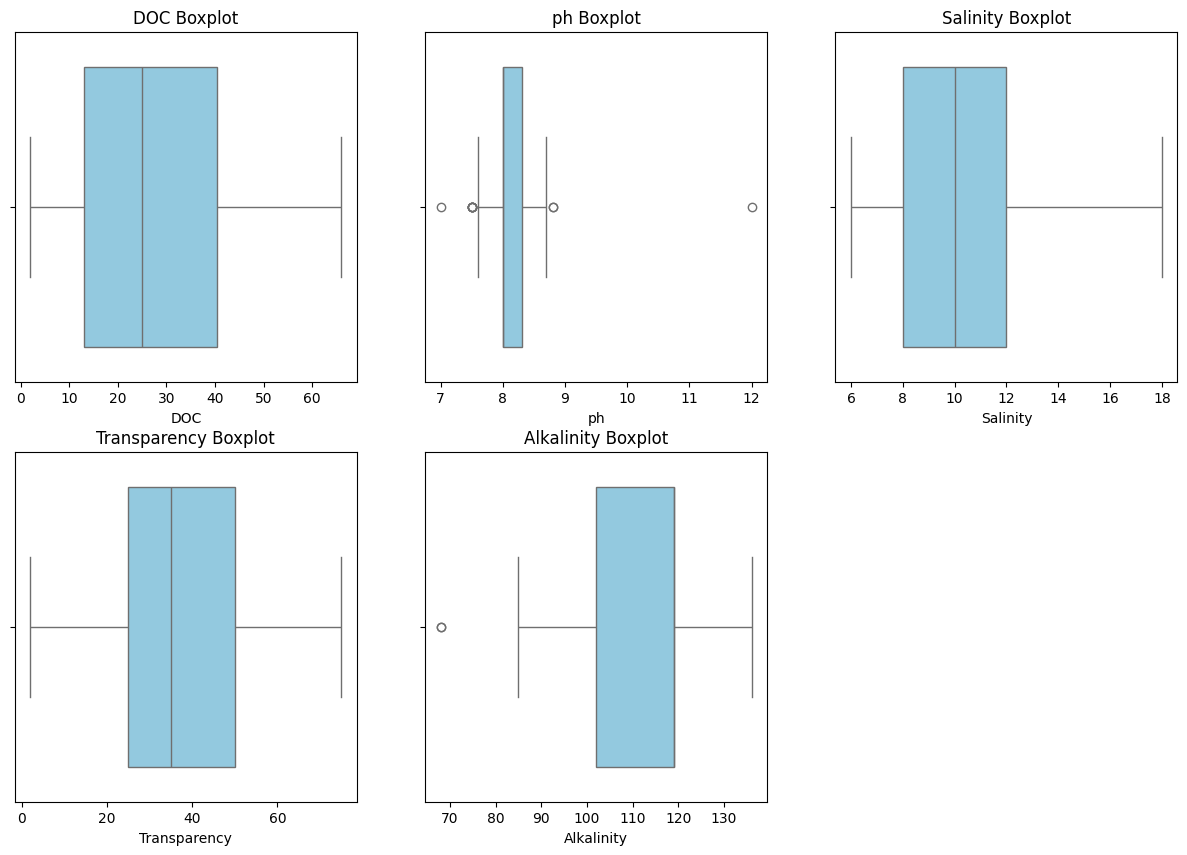

In [81]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)

# Preprocessing

The raw data must be preprocessed into strucutred, high-quality data in order to achieve high-quality predictions using said data.

## Correlation

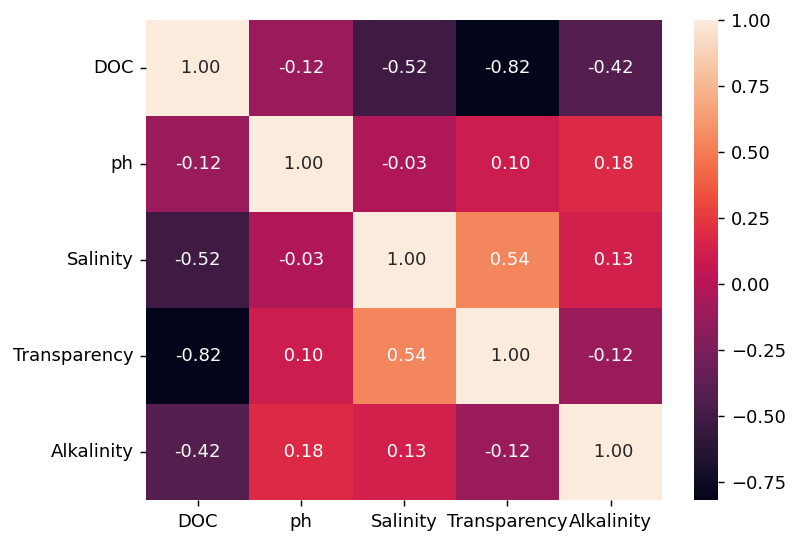

In [82]:
corr = df.select_dtypes(include=['number']).corr()
corr_cleaned = df.select_dtypes(include=['number']).corr()

plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt=' .2f')
plt.show()

# Dropping The Target Variable

In [97]:
X = df.drop(columns =['Status', 'Date', 'PondID'])
y = df.Status
print(X.columns)

Index(['DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity'], dtype='object')


# Isolation Forest

## Model Fitting

In [84]:
classifier = IsolationForest(contamination=0.1)
classifier.fit(X)

IsolationForest(contamination=0.1)

## Predictions

In [85]:
y_predict = classifier.predict(X)
print(y_predict)

[ 1 -1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1
 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1
 -1  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1

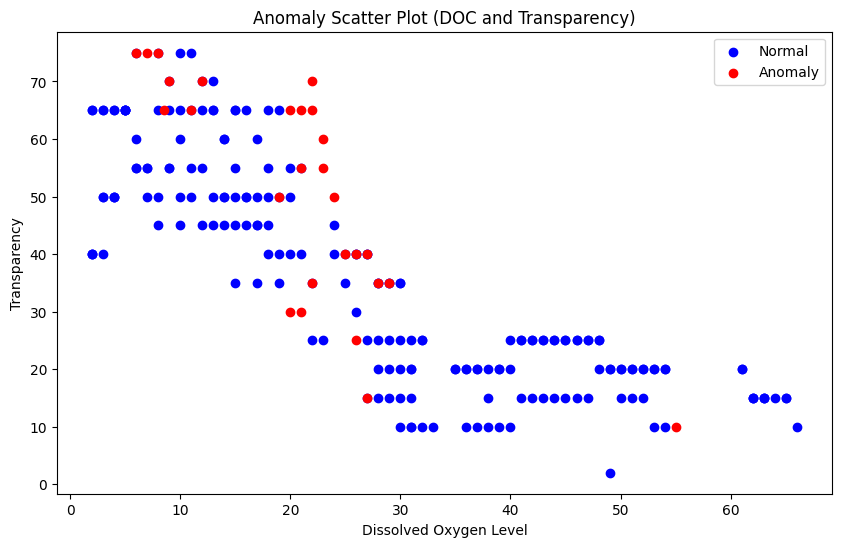

In [104]:
plt.figure(figsize=(10, 6))
plt.xlabel("Dissolved Oxygen Level")
plt.ylabel("Transparency")
plt.title("Anomaly Scatter Plot (DOC and Transparency)")

normal = X[y_predict == 1]
plt.scatter(normal['DOC'], normal['Transparency'], c='blue', label='Normal')

anomalies = X[y_predict == -1]
plt.scatter(anomalies['DOC'], anomalies['Transparency'], c='red', label='Anomaly')

plt.legend()
plt.show()
